# Stealing the Lindhard Variance

The Lindhard papers (NAC I, II, III) have predictions for the variance in charge production. These are done in the reduced variable $\epsilon$ so, I data-theived this function. 

In [1]:
#get the f function from the paper
import dataPython as dp
import numpy as np
import scipy.interpolate as inter
data = dp.getXYdata('data/lind1_var_reformat.txt')
data_0 = dp.getXYdata('data/lind2_var_reformat.txt')

#convert to numpy arrays
e = np.asarray(data['xx'])
Omega2_nu2 = np.asarray(data['yy'])

#smoothing
e = e[e.argsort()]
Omega2_nu2 = Omega2_nu2[e.argsort()]
idx = np.arange(0,np.shape(e)[0])
f_Omega2_nu2 = inter.InterpolatedUnivariateSpline(e[idx%30==0], Omega2_nu2[idx%30==0], k=3)


epr = np.asarray(data_0['xx'])
Omega2_eta2 = np.asarray(data_0['yy'])

#smoothing
epr = epr[epr.argsort()]
Omega2_eta2 = Omega2_eta2[epr.argsort()]
idx = np.arange(0,np.shape(epr)[0])
f_Omega2_eta2 = inter.InterpolatedUnivariateSpline(epr[idx%30==0], Omega2_eta2[idx%30==0], k=3)

In [2]:
#set up a plot 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

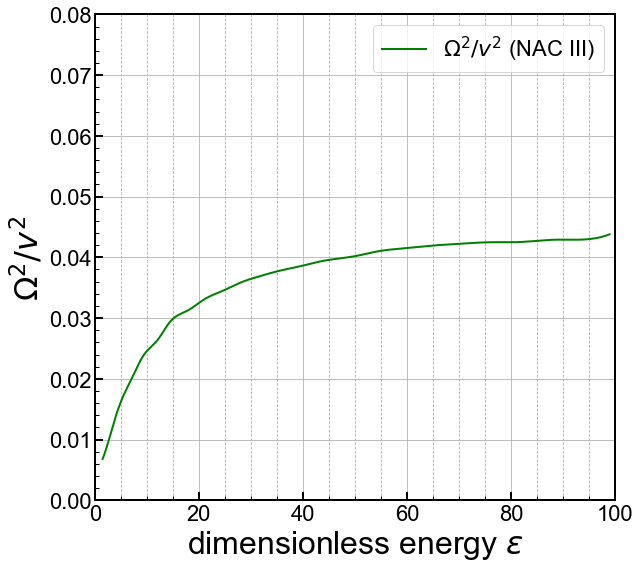

In [3]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=100




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (e, f_Omega2_nu2(e), 'g-', label='$\Omega^2/v^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, xmax)
ax1.set_ylim(0,0.08)
ax1.set_xlabel('dimensionless energy $\epsilon$',**axis_font)
ax1.set_ylabel('$\Omega^2/v^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_nu2.png')
plt.show()

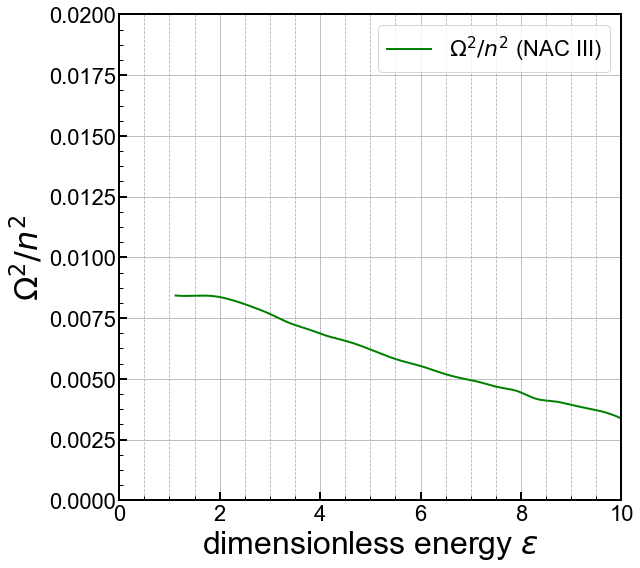

In [4]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (epr, f_Omega2_eta2(epr), 'g-', label='$\Omega^2/n^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, xmax)
ax1.set_ylim(0,0.02)
ax1.set_xlabel('dimensionless energy $\epsilon$',**axis_font)
ax1.set_ylabel('$\Omega^2/n^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_eta2.png')
plt.show()

In [5]:
#convert to energy units for Si (match to Dogherty)
#see N-MISC-18-003 pg 46
Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-5*1000))
Esi_inv = np.vectorize(lambda x: x*(6.87758e-5*1000)/(np.sqrt(2)*2))
#Esi = np.vectorize(lambda x: 2*x/(6.87758e-5*1000)) #MISTAKE; without factor of sqrt(2)

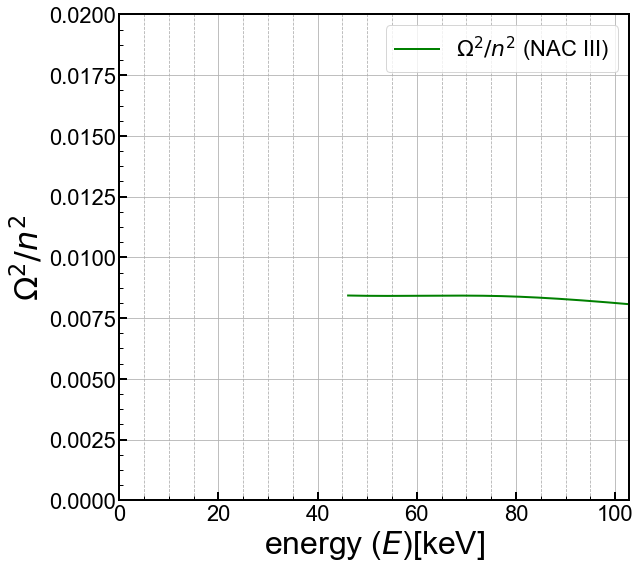

In [6]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=2.5




#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
ax1.plot (Esi(epr), f_Omega2_eta2(epr), 'g-', label='$\Omega^2/n^2$ (NAC III)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, Esi(xmax))
ax1.set_ylim(0,0.02)
ax1.set_xlabel('energy ($E$)[keV]',**axis_font)
ax1.set_ylabel('$\Omega^2/n^2$',**axis_font)
ax1.grid(True)
ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_Omega2_eta2_keV.png')
plt.show()

In [7]:
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
#ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [8]:
print(ylind(10000))

0.3082251685826292


In [9]:
dougherty_data0 = dp.getXYdata('data/Dougherty_fig2_OmegaD_reformat.txt')
dougherty_data1 = dp.getXYdata('data/Dougherty_fig2_OmegaE_reformat.txt')

#convert to numpy arrays
dougherty_e = np.asarray(dougherty_data0['xx'])
dougherty_OmegaD_ovreps_perc = np.asarray(dougherty_data0['yy'])

#smoothing
dougherty_e = dougherty_e[dougherty_e.argsort()]
dougherty_OmegaD_ovreps_perc = dougherty_OmegaD_ovreps_perc[dougherty_e.argsort()]
idx = np.arange(0,np.shape(dougherty_e)[0])
f_dough_OmegaD_ovreps_perc = inter.InterpolatedUnivariateSpline(dougherty_e[idx%30==0], \
                                                                dougherty_OmegaD_ovreps_perc[idx%30==0], k=3)

dougherty_e1 = np.asarray(dougherty_data1['xx'])
dougherty_OmegaE_ovreps_perc = np.asarray(dougherty_data1['yy'])

#smoothing
dougherty_e1 = dougherty_e1[dougherty_e1.argsort()]
dougherty_OmegaE_ovreps_perc = dougherty_OmegaE_ovreps_perc[dougherty_e1.argsort()]
idx = np.arange(0,np.shape(dougherty_e1)[0])
f_dough_OmegaE_ovreps_perc = inter.InterpolatedUnivariateSpline(dougherty_e1[idx%30==0], \
                                                                dougherty_OmegaE_ovreps_perc[idx%30==0], k=3)

In [10]:
lind_data0 = dp.getXYdata('data/lind2_var_OmegaepsD_reformat.txt')
lind_data1 = dp.getXYdata('data/lind2_var_OmegaepsE_reformat.txt')

#convert to numpy arrays
lind_e = np.asarray(lind_data0['xx'])
lind_OmegaD_ovreps_perc = np.sqrt(np.asarray(lind_data0['yy']))*100

#smoothing
lind_e = lind_e[lind_e.argsort()]
lind_OmegaD_ovreps_perc = lind_OmegaD_ovreps_perc[lind_e.argsort()]
idx = np.arange(0,np.shape(lind_e)[0])
f_lind_OmegaD_ovreps_perc = inter.InterpolatedUnivariateSpline(lind_e[idx%30==0], \
                                                                lind_OmegaD_ovreps_perc[idx%30==0], k=3)

#convert to numpy arrays
lind_e1 = np.asarray(lind_data1['xx'])
lind_OmegaE_ovreps_perc = np.sqrt(np.asarray(lind_data1['yy']))*100

#smoothing
lind_e1 = lind_e1[lind_e1.argsort()]
lind_OmegaE_ovreps_perc = lind_OmegaE_ovreps_perc[lind_e1.argsort()]
idx = np.arange(0,np.shape(lind_e1)[0])
f_lind_OmegaE_ovreps_perc = inter.InterpolatedUnivariateSpline(lind_e1[idx%30==0], \
                                                                lind_OmegaE_ovreps_perc[idx%30==0], k=3)

In [11]:
#get Dougherty Data
ddataY = dp.getXYdata_wXYerr('data/Dougherty_Yield.txt')
ddataFluct = dp.getXYdata_wXYerr('data/Dougherty_Fluct.txt')

#convert to numpy arrays
ddata_e = np.asarray(ddataFluct['xx'])
ddata_fluct = np.asarray(ddataFluct['yy'])
ddata_fluct_err = np.asarray(ddataFluct['ey'])

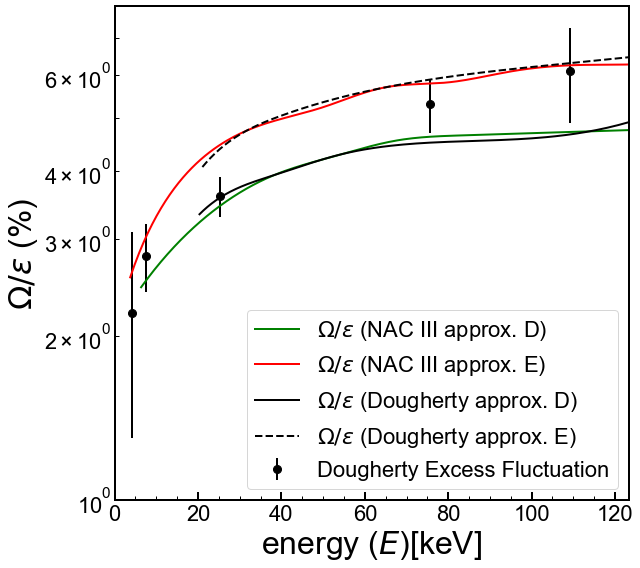

In [12]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=3

ax1.errorbar(ddata_e,ddata_fluct,yerr=[ddata_fluct_err,ddata_fluct_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Dougherty Excess Fluctuation', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lind_e), f_lind_OmegaD_ovreps_perc(lind_e), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lind_e1), f_lind_OmegaE_ovreps_perc(lind_e1), 'r-', label='$\Omega/\epsilon$ (NAC III approx. E)')
#ax1.plot (dougherty_e, dougherty_OmegaD_ovreps_perc, 'k-', label='$\Omega/\epsilon$ (Dougherty approx. D)')
ax1.plot (dougherty_e, f_dough_OmegaD_ovreps_perc(dougherty_e), 'k-', label='$\Omega/\epsilon$ (Dougherty approx. D)')
#ax1.plot (dougherty_e1, dougherty_OmegaE_ovreps_perc, 'k--', label='$\Omega/\epsilon$ (Dougherty approx. E)')
ax1.plot (dougherty_e1, f_dough_OmegaE_ovreps_perc(dougherty_e1), 'k--', label='$\Omega/\epsilon$ (Dougherty approx. E)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, Esi(xmax))
ax1.set_ylim(1,8)
ax1.set_xlabel('energy ($E$)[keV]',**axis_font)
ax1.set_ylabel('$\Omega/\epsilon$ (%)',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_DoghertyFig2_RMSratio_keV.png')
plt.show()

In [13]:
#Now let's try to put in terms of F=\bar{N} (1/Y) * (Omega/E)**2
#ddata_e = np.asarray(ddataFluct['xx'])
epsg = 3.8e-3 #epsilon-gamma for silicon in keV per pair
ddata_fluct_F = (ddata_fluct/100)**2 * (ddata_e/(epsg*ylindv(1000*ddata_e)))
ddata_fluct_F_err = (ddata_fluct_err/100)**2 * (ddata_e/(epsg*ylindv(1000*ddata_e)))
#ddata_fluct_F = (ddata_fluct/100)**2 
#ddata_fluct_F_err = (ddata_fluct_err/100)**2 

print(ddata_e)
print(ddata_fluct_F)
print(ddata_fluct_F_err)


#change over the functions:

f_dough_F_D = lambda x: (f_dough_OmegaD_ovreps_perc(x)/100)**2 * (x/(epsg*ylindv(1000*x)))
f_lind_F_D = lambda x: (f_lind_OmegaD_ovreps_perc(Esi_inv(x))/100)**2 * (x/(epsg*ylindv(1000*x)))
f_dough_F_E = lambda x: (f_dough_OmegaE_ovreps_perc(x)/100)**2 * (x/(epsg*ylindv(1000*x)))
f_lind_F_E = lambda x: (f_lind_OmegaE_ovreps_perc(Esi_inv(x))/100)**2 * (x/(epsg*ylindv(1000*x)))

[109.1   75.7   25.3    7.5    4.15]
[203.24311097 116.70502687  23.26981719   5.28568616   1.9937726 ]
[7.86536092 1.49568564 0.16159595 0.10787115 0.33366855]


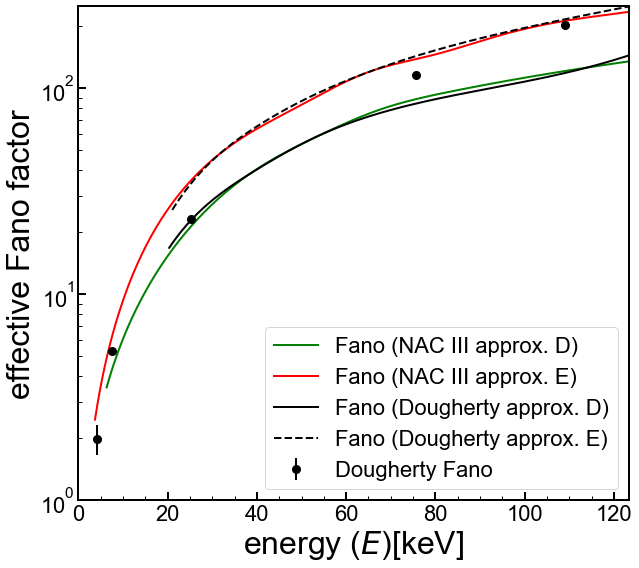

In [14]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=3

ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Dougherty Fano', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lind_e), f_lind_F_D(Esi(lind_e)), 'g-', label='Fano (NAC III approx. D)')
ax1.plot (Esi(lind_e1), f_lind_F_E(Esi(lind_e1)), 'r-', label='Fano (NAC III approx. E)')
#ax1.plot (dougherty_e, dougherty_OmegaD_ovreps_perc, 'k-', label='$\Omega/\epsilon$ (Dougherty approx. D)')
ax1.plot (dougherty_e, f_dough_F_D(dougherty_e), 'k-', label='Fano (Dougherty approx. D)')
#ax1.plot (dougherty_e1, dougherty_OmegaE_ovreps_perc, 'k--', label='$\Omega/\epsilon$ (Dougherty approx. E)')
ax1.plot (dougherty_e1, f_dough_F_E(dougherty_e1), 'k--', label='Fano (Dougherty approx. E)')
#ax1.plot (t120, ft120, 'g-', label='Thomas-Fermi (NAC I 2nd attempt)')
#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')



ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(0.0, Esi(xmax))
ax1.set_ylim(1,250)
ax1.set_xlabel('energy ($E$)[keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NACIII_DoghertyFig2_Eff_Fano_keV.eps')
plt.show()